In [2]:
require 'image';

In [3]:
require 'nn';
require 'nngraph'

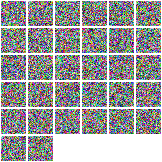

In [10]:
m=nn.SpatialConvolution(3,32,25,25)
itorch.image(m.weight)

In [20]:
require 'ffmpeg'

vid = ffmpeg.Video("videotest.avi")
-- tensors = vid:totensor{}
-- itorch.video(vid)
-- itorch.video('videotest.avi')

ffmpeg -i videotest.avi -r 10 -t 10 -map 0:v:0 -s 320x240 -qscale 1 /Users/xtong/Documents/Code/arion/scratch/videotest.avi_10fps_320x240_10s_c0_sk0_png/frame-%06d.png 2> /dev/null	


Using frames in /Users/xtong/Documents/Code/arion/scratch/videotest.avi_10fps_320x240_10s_c0_sk0_png/frame-%06d.png	


clearing video	


rm -rf /Users/xtong/Documents/Code/arion/scratch/videotest.avi_10fps_320x240_10s_c0_sk0_png	


[string "require 'ffmpeg'..."]:5: attempt to call field 'image' (a nil value)
stack traceback:
	[string "require 'ffmpeg'..."]:5: in main chunk
	[C]: in function 'xpcall'
	/Users/xtong/torch/install/share/lua/5.1/itorch/main.lua:209: in function </Users/xtong/torch/install/share/lua/5.1/itorch/main.lua:173>
	/Users/xtong/torch/install/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	/Users/xtong/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	/Users/xtong/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	/Users/xtong/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	/Users/xtong/torch/install/share/lua/5.1/itorch/main.lua:381: in main chunk
	[C]: in function 'require'
	(command line):1: in main chunk
	[C]: at 0x010b236bd0: 

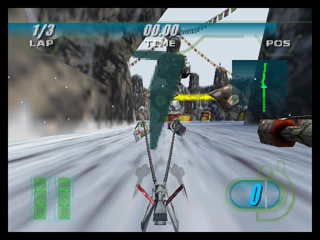

In [23]:
a = vid:get_frame(1,1)
itorch.image(a)
-- WOOO!!!

In [3]:
require 'loadcaffe'

-- model = loadcaffe.load('deploy.prototxt', 'bvlc_alexnet.caffemodel', 'ccn2')
model = loadcaffe.load('vgg_cnn_s/VGG_CNN_S_deploy.prototxt', 'vgg_cnn_s/VGG_CNN_S.caffemodel', 'ccn2')




Successfully loaded vgg_cnn_s/VGG_CNN_S.caffemodel


conv1: 96 3 7 7


conv2: 256 96 5 5


conv3: 512 256 3 3


conv4: 512 512 3 3


conv5: 512 512 3 3


fc6: 1 1 18432 4096


fc7: 1 1 4096 4096


fc8: 1 1 4096 1000


In [ ]:
-- This code snippet needs to be run offline in qlua, not through iTorch. 
-- only qlua works with the 'nngraph'/'graphviz' compatibility requirement.
-- This is due to iTorch using LUAJIT instead of QLUA as the lua driver/terminal/kernel.

h1 = nn.Linear(20, 20)()
h2 = nn.Linear(10, 10)()
hh1 = nn.Linear(20, 1)(nn.Tanh()(h1))
hh2 = nn.Linear(10, 1)(nn.Tanh()(h2))
madd = nn.CAddTable()({hh1, hh2})
oA = nn.Sigmoid()(madd)
oB = nn.Tanh()(madd)
gmod = nn.gModule({h1, h2}, {oA, oB})

x1 = torch.rand(20)
x2 = torch.rand(10)

gmod:updateOutput({x1, x2})
gmod:updateGradInput({x1, x2}, {torch.rand(1), torch.rand(1)})
graph.dot(gmod.fg, 'Big MLP')